##Importing relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

##Initialising parameters

In [2]:
#initialising parameters
a = 0.5
r = 0.1
b = 0.1

##Defining required functions

In [3]:
#defining f(v), dv/dt and dw/dt as functions of their respective paramaters
def f (v):
    return v *(a-v)*(v-1)

def dwdt (v, w):
    return b*v - r*w

def dvdt (v, w, Im) :
    return f(v) - w + Im

##Finding nullclines

In [4]:
#defining function that returns nullclines
def nullclines (v, Im):
    wnc = b*v/r
    vnc = f(v) + Im
    return wnc, vnc

##Euler Integration

In [5]:
#defining function to perform forward Euler Integration for a given time at a given timestep
def forwardEuler (w, v, Im, dt, tn):
    n = int(tn / dt)
    whist = []  #stores history of all points on integration, thus resulting in the curve of w vs t
    vhist = []  #stores history of all points on integration, thus resulting in the curve of v vs t

    for i in range (n):

        #integration for w
        w = w + dwdt (v, w) * dt
        whist.append (w)

        #integration for v
        v = v + dvdt (v, w, Im) * dt
        vhist.append (v)

    return whist, vhist

##Plotting phase plots

In [6]:
def phasePlot(Im, xlim, ylim, start):
    color = ['gold', 'palegreen', 'hotpink', 'deepskyblue', 'cyan', 'magenta', 'silver', 'bisque']*2

    #initialising v and w (quantities on x and y axes respectively)
    v = np.linspace(xlim[0], xlim[1], 100)
    w = np.linspace(xlim[0], xlim[1], 100)

    #creating meshes with w and v
    vmesh, wmesh = np.meshgrid(v, w)

    #calculating dv/dt and dw/dt using the mesh points
    vmt = dvdt(vmesh, wmesh, Im)
    wmt = dwdt(vmesh, wmesh)

    #calculating the nullclines
    wnc, vnc = nullclines(v, Im)

    #actual plotting
    plt.figure()
    plt.plot(v, vnc, 'b', label = 'v nullcline')
    plt.plot(w, wnc, 'r', label = 'w nullcline')
    plt.legend()
    plt.xlim(xlim[0], xlim[1])
    plt.title(f'Phase Plot, Im={Im}')
    plt.xlabel('v')
    plt.ylabel('w')

    #for specific points
    if start:
        for i in range(len(start)):
            plt.streamplot(vmesh, wmesh, vmt, wmt, start_points=[start[i]], color=color[i], integration_direction='forward', arrowsize=2)

    #general phase plot for all points in the mesh
    else:
        plt.streamplot(vmesh, wmesh, vmt, wmt, color=color[0])

    plt.grid()
  

##Plotting trajectory

In [7]:
def trajPlot(y, title="", ylim=(), x=None, xlim=()):
    plt.figure()
    plt.title(title)
    color = ["b", "r"]

    #if x values not given, simply plot given y
    if not x:
        for i in y:
            plt.plot(i)

    #if x values given, plot according to given x
    else:
        for i,j in enumerate(y):
            plt.plot(x, j, color = color[i])

    #setting limits for x and y axes
    if ylim:
        plt.ylim(ylim)
    if xlim:
        plt.xlim(xlim)

    plt.xlabel("time")
    plt.ylabel("voltage")
    plt.legend(["v(t)", "w(t)"])

    plt.grid()



##Case 1
####I ext = 0

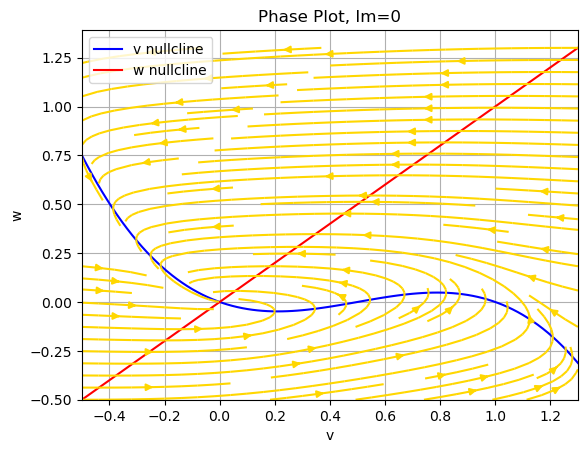

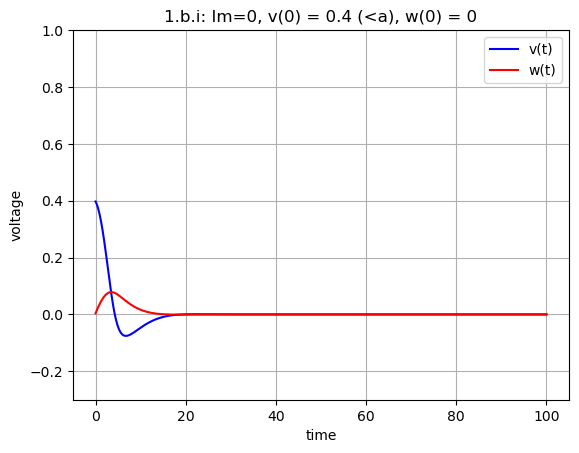

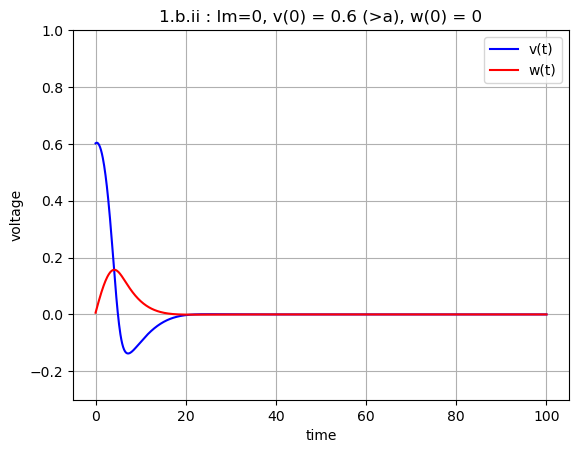

In [8]:
### Case 1: Iext = 0
dt = 0.1
tn = 100
Im = 0

x = list(np.linspace(0,100,1000))

# 1.a
phasePlot(Im,(-0.5,1.3), (-0.5,0.5), [])
plt.savefig('1a')
plt.show()

# 1.b.i: I=0, v(0) = 0.4 (<a) and w(0) = 0
whist, vhist = forwardEuler(0, 0.4, Im, dt, tn)
trajPlot([vhist, whist], f"1.b.i: Im={Im}, v(0) = 0.4 (<a), w(0) = 0", (-0.3,1), x)
plt.savefig('1bi')
plt.show()


# 1.b.ii: I=0, v(0) = 0.5 (>a) and w(0) = 0
whist, vhist = forwardEuler(0, 0.6, Im, dt, tn)
trajPlot([vhist, whist], f"1.b.ii : Im={Im}, v(0) = 0.6 (>a), w(0) = 0", (-0.3,1), x)
plt.savefig('1bii')
plt.show()

##Case 2
####I ext = 0.5

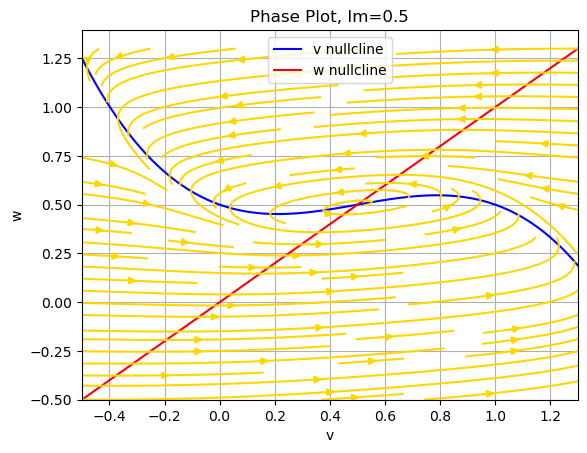

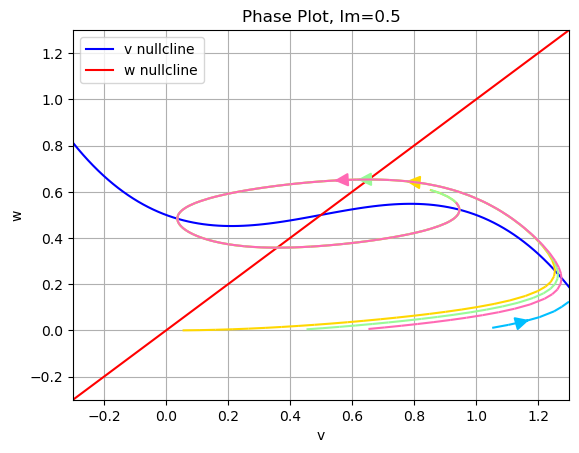

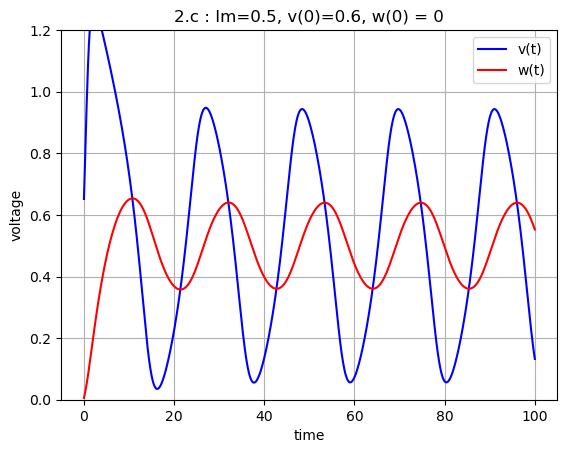

In [9]:
### Case 2: Iext = 0.5
dt = 0.1
tn = 100
Im = 0.5

x = list(np.linspace(0,100,1000))

# 2.a
phasePlot(Im,(-0.5,1.3), (0.2,1), [])
plt.savefig('2a')
plt.show()

# 2.b
phasePlot(Im,(-0.3,1.3), (0, 3), [[0,0], [0.4,0], [0.6, 0], [1, 0]])
plt.savefig('2b')
plt.show()

# 2.c: Im=0.5, v(0) = 0.6 and w(0) = 0
whist, vhist = forwardEuler(0, 0.6, Im, dt, tn)
trajPlot([vhist, whist], f"2.c : Im={Im}, v(0)=0.6, w(0) = 0", (0,1.2), x)
plt.savefig('2c')
plt.show()

##Case 3
####I ext = 0.9

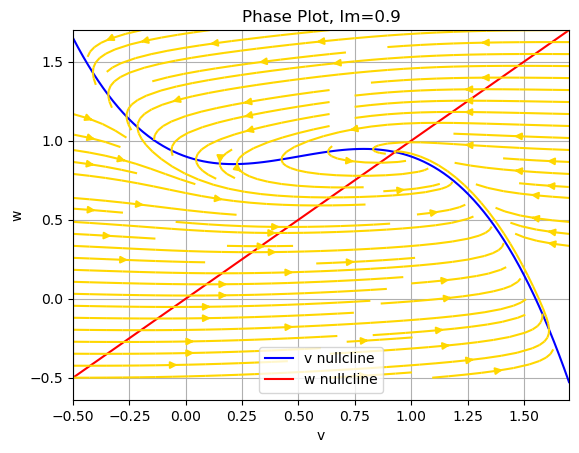

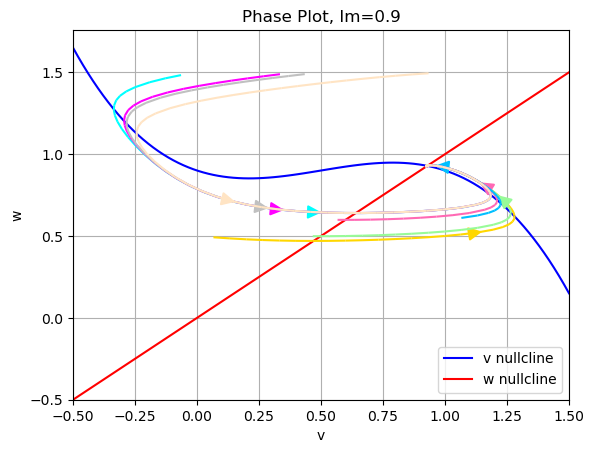

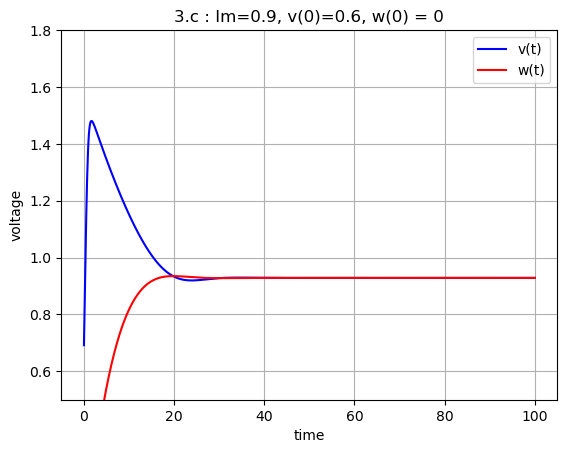

In [10]:
### Case 3: Iext = 0.9
dt = 0.1
tn = 100
Im = 0.9

x = list(np.linspace(0,100,1000))

# 3.a
phasePlot(Im,(-0.5,1.7), (0.1,1.2), [])
plt.savefig('3a')
plt.show()

#3.b
phasePlot(Im,(-0.5,1.5), (0, 1.5), [[0,0.5], [0.4,0.5], [0.5, 0.6], [1, 0.6], [0,1.5], [0.4,1.5], [0.5, 1.5], [1, 1.5]])
plt.savefig('3b')
plt.show()

# 3.c: I=0.9, v(0) = 0.6 and w(0) = 0
whist, vhist = forwardEuler(0, 0.6, Im, dt, tn)
trajPlot([vhist, whist], f"3.c : Im={Im}, v(0)=0.6, w(0) = 0", (0.5,1.8), x)
plt.savefig('3c')
plt.show()

##Case 4
####I ext = 0.05

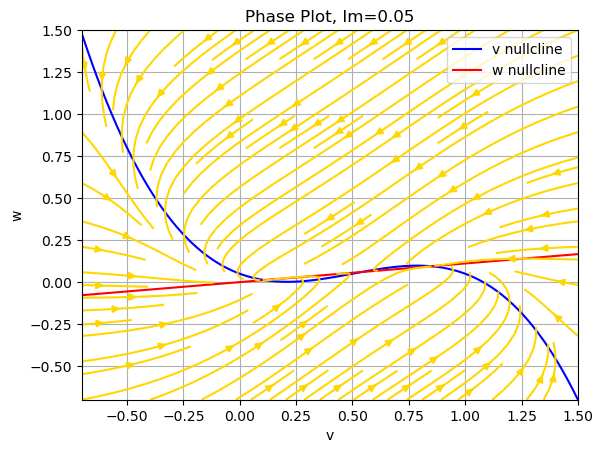

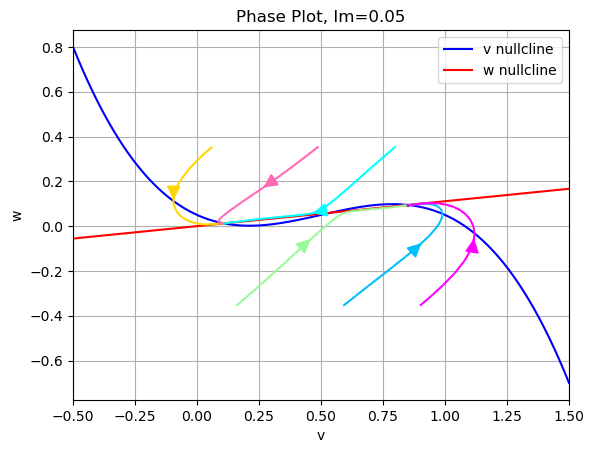

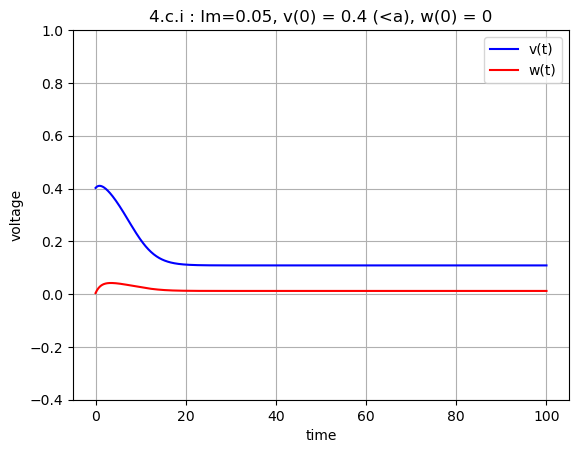

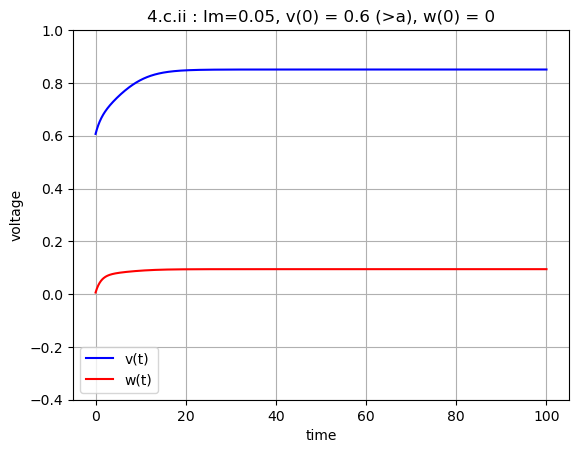

In [11]:
### Case 4: Choosing parameters r and b, and Im
dt = 0.1
tn = 100
Im = 0.05
r = 0.9
b = 0.1

x = list(np.linspace(0,100,1000))

# 4.a
phasePlot(Im,(-0.7,1.5), (0.1,1.2), [])
plt.savefig('4a')
plt.show()

#4.b
phasePlot(Im,(-0.5,1.5), (0, 1.5), [[0.11,0.4], [0.11, -0.4], [0.54, 0.4], [0.54, -0.4], [0.85, 0.4], [0.85, -0.4]])
plt.savefig('4b')
plt.show()

# 4.c.i: Im=0.05, v(0) = 0.4 (<a) and w(0) = 0
whist, vhist = forwardEuler(0, 0.4, Im, dt, tn)
trajPlot([vhist, whist], f"4.c.i : Im={Im}, v(0) = 0.4 (<a), w(0) = 0", (-0.4,1), x)
plt.savefig('4ci')
plt.show()

# 4.c.ii: Im=0.05, v(0) = 0.6 (>a) and w(0) = 0
whist, vhist = forwardEuler(0, 0.6, Im, dt, tn)
trajPlot([vhist, whist], f"4.c.ii : Im={Im}, v(0) = 0.6 (>a), w(0) = 0", (-0.4,1), x)
plt.savefig('4cii')
plt.show()
